In [1]:
import numpy as np
from keras.layers import Dense, Input, Add
from keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt
from scipy import special
import keras.backend as K

from Source import RM

Using TensorFlow backend.


In [2]:
m = 5
r = 1
length = 2**m

G = RM.G_matrix(length, m, r)
G_p = RM.G_prime(G, m)

In [3]:
model_1 = load_model('Model/model_(1,5)_p1.h5')
model_2 = load_model('Model/model_(1,5)_p2.h5')
model_3 = load_model('Model/model_(1,5)_p3.h5')
model_4 = load_model('Model/model_(1,5)_p4.h5')
model_5 = load_model('Model/model_(1,5)_p5.h5')

In [4]:
total_model_1_BER = np.zeros(11)
total_model_2_BER = np.zeros(11)
total_model_3_BER = np.zeros(11)
total_model_4_BER = np.zeros(11)
total_model_5_BER = np.zeros(11)

In [5]:
file_buffer = 'Result/model_(1,5)_p1.csv'
model_1_f = open(file_buffer, 'w')

file_buffer = 'Result/model_(1,5)_p2.csv'
model_2_f = open(file_buffer, 'w')

file_buffer = 'Result/model_(1,5)_p3.csv'
model_3_f = open(file_buffer, 'w')

file_buffer = 'Result/model_(1,5)_p4.csv'
model_4_f = open(file_buffer, 'w')

file_buffer = 'Result/model_(1,5)_p5.csv'
model_5_f = open(file_buffer, 'w')

In [6]:
for i in range(0, 11):
    model_1_BER = 0
    model_2_BER = 0
    model_3_BER = 0
    model_4_BER = 0
    model_5_BER = 0
    print('snr',i)
    for j in range(10):
        msg = np.random.randint(2, size = (10**4, m+r))
        send_code, recived_code = RM.Encoding(msg, G, i, length)
        
        model_1_ae_code = model_1.predict(recived_code, verbose=0)
        model_2_ae_code = model_2.predict(recived_code, verbose=0)
        model_3_ae_code = model_3.predict(recived_code, verbose=0)
        model_4_ae_code = model_4.predict(recived_code, verbose=0)
        model_5_ae_code = model_5.predict(recived_code, verbose=0)
        
        model_1_estimated_code = RM.Decoding(model_1_ae_code, m, length, r, G_p)
        model_2_estimated_code = RM.Decoding(model_2_ae_code, m, length, r, G_p)
        model_3_estimated_code = RM.Decoding(model_3_ae_code, m, length, r, G_p)
        model_4_estimated_code = RM.Decoding(model_4_ae_code, m, length, r, G_p)
        model_5_estimated_code = RM.Decoding(model_5_ae_code, m, length, r, G_p)
        
        model_1_count = ((msg + model_1_estimated_code)%2).sum()
        model_2_count = ((msg + model_2_estimated_code)%2).sum()
        model_3_count = ((msg + model_3_estimated_code)%2).sum()
        model_4_count = ((msg + model_4_estimated_code)%2).sum()
        model_5_count = ((msg + model_5_estimated_code)%2).sum()
        
        model_1_BER += model_1_count / (msg.shape[0] * msg.shape[1])
        model_2_BER += model_2_count / (msg.shape[0] * msg.shape[1])
        model_3_BER += model_3_count / (msg.shape[0] * msg.shape[1])
        model_4_BER += model_4_count / (msg.shape[0] * msg.shape[1])
        model_5_BER += model_5_count / (msg.shape[0] * msg.shape[1])
    
    total_model_1_BER[i] = model_1_BER / (10)
    total_model_2_BER[i] = model_2_BER / (10)
    total_model_3_BER[i] = model_3_BER / (10)
    total_model_4_BER[i] = model_4_BER / (10)
    total_model_5_BER[i] = model_5_BER / (10)
    
    write_buffer = 'Eb_No, %f, ' %(i)
    model_1_f.write(write_buffer)
    model_2_f.write(write_buffer)
    model_3_f.write(write_buffer)
    model_4_f.write(write_buffer)
    model_5_f.write(write_buffer)
    
    write_buffer = 'BER, %.10f\n' % (total_model_1_BER[i])
    model_1_f.write(write_buffer)
    write_buffer = 'BER, %.10f\n' % (total_model_2_BER[i])
    model_2_f.write(write_buffer)
    write_buffer = 'BER, %.10f\n' % (total_model_3_BER[i])
    model_3_f.write(write_buffer)
    write_buffer = 'BER, %.10f\n' % (total_model_4_BER[i])
    model_4_f.write(write_buffer)
    write_buffer = 'BER, %.10f\n' % (total_model_5_BER[i])
    model_5_f.write(write_buffer)
    
model_1_f.close()
model_2_f.close()
model_3_f.close()
model_4_f.close()
model_5_f.close()

snr 0
snr 1
snr 2
snr 3
snr 4
snr 5
snr 6
snr 7
snr 8
snr 9
snr 10


In [7]:
bpsk_BER = np.zeros(11)
for i in range(0,11):
    bpsk_BER[i] = 0.5 * special.erfc((np.sqrt(10**(i/10))))

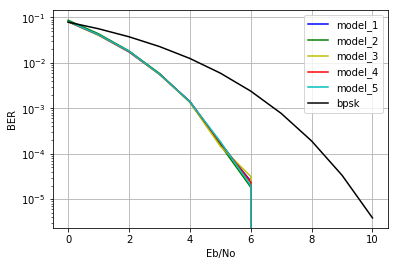

In [8]:
x = np.array(range(0, 11))

plt.semilogy(x,total_model_1_BER, label='model_1', color='b')
plt.semilogy(x,total_model_2_BER, label='model_2', color='g')
plt.semilogy(x,total_model_3_BER, label='model_3', color='y')
plt.semilogy(x,total_model_4_BER, label='model_4', color='r')
plt.semilogy(x,total_model_5_BER, label='model_5', color='c')


plt.semilogy(x,bpsk_BER, label='bpsk', color='k')


plt.xlabel('Eb/No')
plt.ylabel('BER')

plt.legend()
plt.grid(True)
plt.show()